## DATAMECUM 
 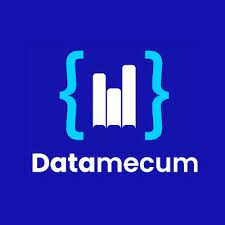
 
### Biclustering
#### Emma Amorós Belda
 


# Biclustering

Algorimto de biclustering. Agrupa filas y columnas de una matriz de datos en 'biclusters', siendo una submatriz de la matriz de datos original.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1007%2Fs10479-020-03607-7/MediaObjects/10479_2020_3607_Fig1_HTML.png">

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# generate a random matrix
data = np.arange(100).reshape(10, 10)
print("Matrix (10,10)")
print(data)

Matrix (10,10)
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [1]:
# choose a bicluster



Los algoritmos de biclustering pueden definirse de dos formas:
- Cada fila y cada columna pertenece a un bicluster
- Cada fila pertenece a todos los grupos de columnas y cada columna pertenece a todos los grupos de filas. 

Para visualizar, las filas y las columnas de la matriz se puede reorganizar para que el bicluster sea contiguo.

# Co-Clustering

Generamos un conjunto de datos y lo agrupamos mediante el algoritmo Co-Clustering: cada fila y cada columna pertenece a un bicluster 


<img src="https://media.geeksforgeeks.org/wp-content/uploads/20220921140116/Untit.png">

In [4]:
from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

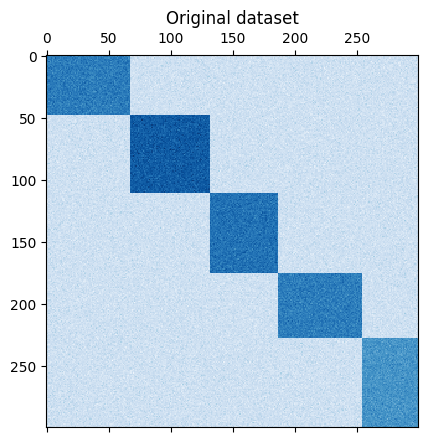

In [5]:
# generate the data with matrix of small values and bicluster with large values

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0
)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()

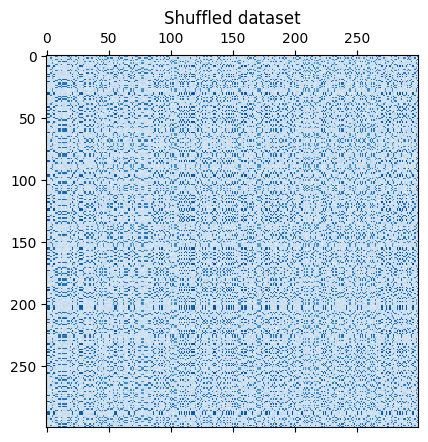

In [7]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

In [8]:
# train the data
model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)

SpectralCoclustering(n_clusters=5, random_state=0)

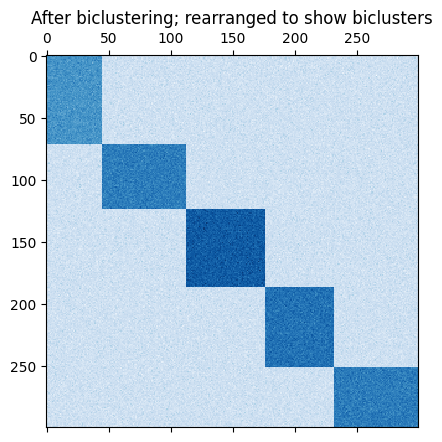

In [9]:
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

In [10]:
# evaluate the model (diference between real and fit)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("Evaluation: Consensus score is {:.3f}".format(score))

Evaluation: Consensus score is 1.000


# Ejercicios

¿qué me devuelve model-biclusters?



### ¿qué pasa si utilizo un mayor número de clusters?

In [2]:
# train the data




In [3]:
# evaluate the model (diference between real and fit)



# Bi-Clustering

Generamos un conjunto de datos y agrupamos utilizando el algoritmo SpectralBiclustering: la matriz tiene estructura de tablero de ajedrez. 



<img src="https://ars.els-cdn.com/content/image/1-s2.0-S002002551930893X-gr1.jpg">

In [28]:
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering

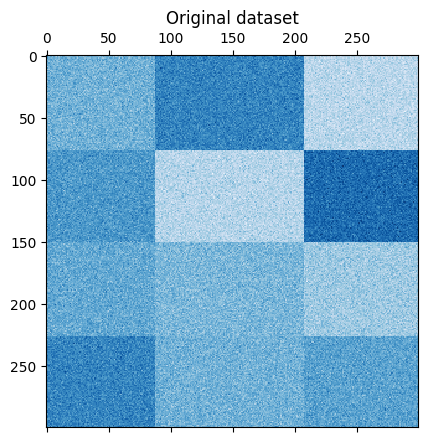

In [29]:
# generate the random data
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=0
)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
plt.show()

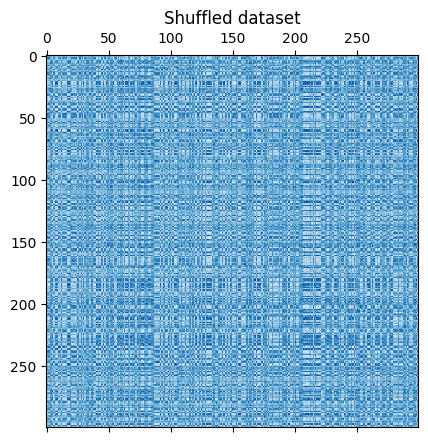

In [30]:
# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")
plt.show()

Evaluation: Consensus score 1.0


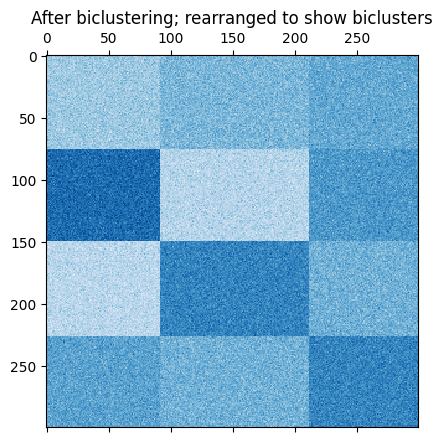

In [31]:
# train the data
model = SpectralBiclustering(n_clusters=n_clusters, method="log", random_state=0)
model.fit(data)

# evaluate the model (diference between real and fit)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("Evaluation: Consensus score {:.1f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
plt.show()

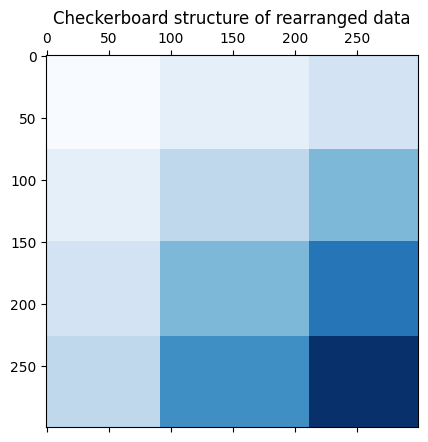

In [32]:
plt.matshow(
    np.outer(np.sort(model.row_labels_) + 1, np.sort(model.column_labels_) + 1),
    cmap=plt.cm.Blues,
)
plt.title("Checkerboard structure of rearranged data")
plt.show()